### Read the Datasets

In [16]:
import pandas as pd

# Load the train and test data
train_df = pd.read_csv('/kaggle/input/train-csv/train.csv')
# test_df = pd.read_csv('test.csv')

# Preview data
train_df.head()


,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


### Extract and focus on the essential columns for analysis


In [17]:
train_df = train_df.drop(columns=['model_a', 'model_b'])
# test_df = test_df.drop(columns=['model_a', 'model_b'])

train_df.head()
# test_df.head()

,id,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [18]:
type(train_df['prompt'][0])

str

In [19]:
# Map the 'winner' columns to a single column with values 1, 2, or 3
def map_winner(row):
    if row['winner_model_a'] == 1:
        return 'model_a'  # Class 1 for Model A
    elif row['winner_model_b'] == 1:
        return 'model_b'  # Class 2 for Model B
    elif row['winner_tie'] == 1:
        return 'tie'  # Class 3 for Tie

# Apply the mapping function to create a single target column
train_df['winner_label'] = train_df.apply(map_winner, axis=1)

# Validate the transformation
train_df.head()

,id,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,winner_label
0,30192,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,model_a
1,53567,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,model_b
2,65089,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,tie
3,96401,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,model_a
4,198779,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,model_b


In [20]:
train_df = train_df.drop(columns=['winner_model_a', 'winner_model_b', 'winner_tie'])

In [21]:
train_df.head()

,id,prompt,response_a,response_b,winner_label
0,30192,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",model_a
1,53567,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",model_b
2,65089,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",tie
3,96401,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",model_a
4,198779,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",model_b


[chatgpt convo and suggested code](https://chatgpt.com/share/6794623e-a300-8012-a1ca-5a2b78183d9e)

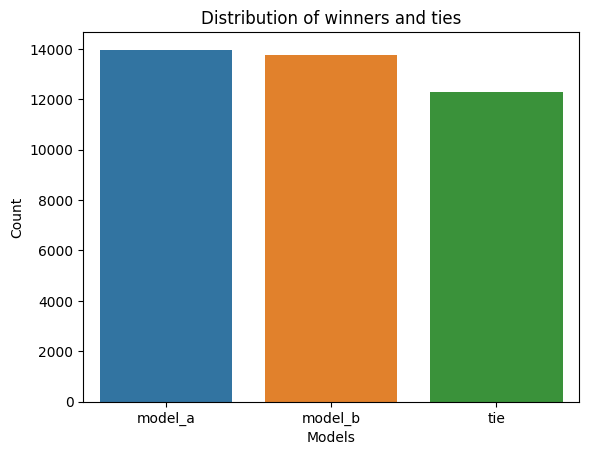

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='winner_label', data=train_df)
plt.title('Distribution of winners and ties')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

In [23]:
train_df['input_text'] = train_df['prompt'] + " [SEP] " + train_df['response_a'] + " [SEP] " + train_df['response_b']
# test_df['input_text'] = test_df['prompt'] + " [SEP] " + test_df['response_a'] + " [SEP] " + test_df['response_b']

In [24]:
train_df.head()

,id,prompt,response_a,response_b,winner_label,input_text
0,30192,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",model_a,"[""Is it morally right to try to have a certain..."
1,53567,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",model_b,"[""What is the difference between marriage lice..."
2,65089,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",tie,"[""explain function calling. how would you call..."
3,96401,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",model_a,"[""How can I create a test set for a very rare ..."
4,198779,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",model_b,"[""What is the best way to travel from Tel-Aviv..."


In [25]:
train_df = train_df.drop(columns=['prompt', 'response_a', 'response_b'])

In [26]:
train_df.rename(columns={'input_text': 'text', 'winner_label': 'label_text'}, inplace=True)

# Map the 'label_text' to integers
label_mapping = {'model_a': 0, 'model_b': 1, 'tie': 2}
train_df['label'] = train_df['label_text'].map(label_mapping)
train_df.head()

,id,label_text,text,label
0,30192,model_a,"[""Is it morally right to try to have a certain...",0
1,53567,model_b,"[""What is the difference between marriage lice...",1
2,65089,tie,"[""explain function calling. how would you call...",2
3,96401,model_a,"[""How can I create a test set for a very rare ...",0
4,198779,model_b,"[""What is the best way to travel from Tel-Aviv...",1


In [27]:
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict

# Split the dataset into train, validation, and test sets
train_data, temp_data = train_test_split(train_df, test_size=0.5, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Convert to Hugging Face Dataset format
train_dataset = Dataset.from_pandas(train_data[['text', 'label', 'label_text']])
val_dataset = Dataset.from_pandas(val_data[['text', 'label', 'label_text']])
test_dataset = Dataset.from_pandas(test_data[['text', 'label', 'label_text']])

# Create a DatasetDict
main_dataset = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})


In [28]:
main_dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 20000
    })
    validation: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['text', 'label', 'label_text', '__index_level_0__'],
        num_rows: 10000
    })
})

In [ ]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
model = TFAutoModel.from_pretrained("bert-base-uncased")



In [ ]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


The `AutoTokenizer` class in the Hugging Face Transformers library automatically retrieves the appropriate tokenizer for a given model, simplifying the process of loading the correct tokenizer by using the model's name or path.

### Key Functions:
1. **Automatic Selection**: Chooses the correct tokenizer class for a model.
2. **Ease of Use**: Simplifies loading tokenizers for different models.
3. **Consistency**: Ensures compatibility with the model.



### Documentation:
For more details, visit the [AutoTokenizer Documentation](https://huggingface.co/transformers/model_doc/auto.html#autotokenizer).








In [ ]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [ ]:
winners_encoded = main_dataset.map(tokenize, batched=True, batch_size=None)


In [ ]:
winners_encoded

In [ ]:
winners_encoded.set_format('tf', 
                            columns=['input_ids', 'attention_mask', 'token_type_ids', 'label'])


In [ ]:
BATCH_SIZE = 64

def order(inp):
    '''
    This function will group all the inputs of BERT
    into a single dictionary and then output it with
    labels.
    '''
    data = list(inp.values())
    return {
        'input_ids': data[1],
        'attention_mask': data[2],
        'token_type_ids': data[3]
    }, data[0]

# converting train split of `emotions_encoded` to tensorflow format
train_dataset = tf.data.Dataset.from_tensor_slices(winners_encoded['train'][:])
# set batch_size and shuffle
train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
# map the `order` function
train_dataset = train_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

# ... doing the same for test set ...
test_dataset = tf.data.Dataset.from_tensor_slices(winners_encoded['test'][:])
test_dataset = test_dataset.batch(BATCH_SIZE)
test_dataset = test_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)


In [ ]:
inp, out = next(iter(train_dataset)) # a batch from train_dataset
print(inp, '\n\n', out)

In [ ]:
class BERTForClassification(tf.keras.Model):
    
    def __init__(self, bert_model, num_classes):
        super().__init__()
        self.bert = bert_model
        self.fc = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    def call(self, inputs):
        x = self.bert(inputs)[1]
        return self.fc(x)

In [ ]:
classifier = BERTForClassification(model, num_classes=6)

classifier.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
history = classifier.fit(
    train_dataset,
    epochs=3
)

The `datasets.arrow_dataset.Dataset` is a class from the Hugging Face `datasets` library. It represents a dataset in an efficient, memory-mapped format called Arrow. This class provides various methods to manipulate, transform, and access the dataset.

### Key Features:
1. **Efficient Storage**: Uses Apache Arrow for efficient data storage and access.
2. **Transformations**: Supports various data transformations like mapping, filtering, and shuffling.
3. **Interoperability**: Can be easily converted to other formats like Pandas DataFrames, NumPy arrays, and PyTorch tensors.



### Documentation:
For more detailed information, you can refer to the official documentation: [Hugging Face Datasets Documentation](https://huggingface.co/docs/datasets/package_reference/main_classes.html#datasets.Dataset).
